In [3]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
fake_df = pd.read_csv("Fake.csv")
true_df = pd.read_csv("True.csv")

In [5]:
fake_df["label"] = 0
true_df["label"] = 1

In [6]:
df = pd.concat([fake_df, true_df], axis=0)
df = df[["text", "label"]]

In [7]:
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (44898, 2)


,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [8]:
stop_words = set(stopwords.words("english"))

In [9]:
def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

df["cleaned_text"] = df["text"].apply(clean_text)

In [10]:
X = df["cleaned_text"]
y = df["label"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
vectorizer = TfidfVectorizer(max_features=5000)

In [13]:
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [14]:
log_model = LogisticRegression(max_iter=2000)
log_model.fit(X_train_tfidf, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [15]:
def predict_news(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    cleaned_text = " ".join(words)

    text_vector = vectorizer.transform([cleaned_text])

    prediction = log_model.predict(text_vector)[0]
    probability = log_model.predict_proba(text_vector)[0]

    confidence = round(max(probability) * 100, 2)

    if prediction == 1:
        return f"Real News (Confidence: {confidence}%)"
    else:
        return f"Fake News (Confidence: {confidence}%)"


In [16]:
print("Fake News Detection System")
print("----------------------------")

user_text = input("Enter news text: ")

print("Prediction:", predict_news(user_text))

Fake News Detection System
----------------------------
Prediction: Fake News (Confidence: 90.98%)


In [17]:
y_pred_log = log_model.predict(X_test_tfidf)

In [18]:
print("Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Results
Accuracy: 0.9899777282850779
Confusion Matrix:
 [[4681   52]
 [  38 4209]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4733
           1       0.99      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [19]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [20]:
y_pred_nb = nb_model.predict(X_test_tfidf)

In [21]:
print("Naive Bayes Results")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

Naive Bayes Results
Accuracy: 0.9457683741648107


In [22]:
accuracies = [accuracy_score(y_test, y_pred_log),accuracy_score(y_test, y_pred_nb)]

In [23]:
models = ["Logistic Regression", "Naive Bayes"]

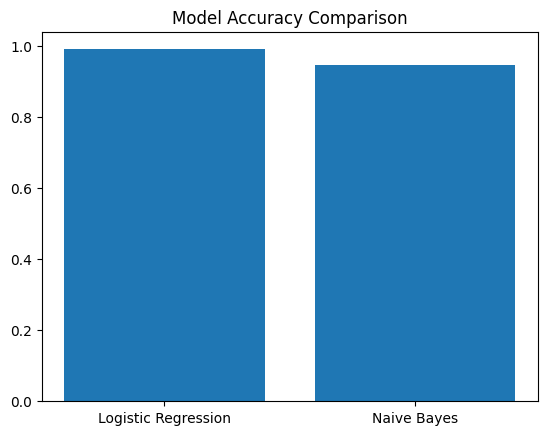

In [24]:
plt.figure()
plt.bar(models, accuracies)
plt.title("Model Accuracy Comparison")
plt.show()

In [25]:
feature_names = np.array(vectorizer.get_feature_names_out())
coefficients = log_model.coef_[0]

In [26]:
top_fake_words = feature_names[np.argsort(coefficients)[:15]]
top_real_words = feature_names[np.argsort(coefficients)[-15:]]

In [27]:
print("Top Fake News Indicators:\n", top_fake_words)
print("\nTop Real News Indicators:\n", top_real_words)

Top Fake News Indicators:
 ['via' 'image' 'gop' 'mr' 'hillary' 'even' 'american' 'america' 'like'
 'obama' 'wire' 'rep' '21st' 'isis' 'know']

Top Real News Indicators:
 ['edt' 'don' 'us' 'he' 'monday' 'friday' 'thursday' 'tuesday' 'washington'
 'wednesday' 'we' 'the' 'it' 'said' 'reuters']
